## Suprevised learning

We gaan kijken wat er mogelijk is met suprevised learning, door de data van de fiets snelwegen met elkaar te vergelijken. 

In [98]:
# Library imports
import itertools
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics

In [141]:
# Functions for correlation and performance measurement

# Check correlation within the data
def plot_corr(df,size=10):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr,cmap=plt.cm.Oranges)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for tick in ax.get_xticklabels():
        tick.set_rotation(45) 
    plt.show()

# Measure performance 
def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confusion_matrix=True):
    y_pred = clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")

    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")

    if show_confusion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")
        
## Function for plotting the confusion matrix       
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues_r,
                          figsize=(30, 25)):
    matrix = confusion_matrix(y_true, y_pred)


    plt.figure(figsize=figsize)
    plt.imshow(matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 size=int((figsize[0] / 10) * 8),
                 color="green" if matrix[i, j] > thresh else "red")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [100]:
# Import on each year
pd_2015 = gpd.read_file('data/Oss - Den Bosch 2015.geojson')
pd_2016 = gpd.read_file('data/Oss - Den Bosch 2016.geojson')
pd_2017 = gpd.read_file('data/Oss - Den Bosch 2017.geojson')

# All years together
pd_all = gpd.read_file('data/netwerk-2016.json')

pd_all.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1121087 entries, 0 to 1121086
Data columns (total 9 columns):
LINKNUMMER    1121087 non-null int64
SOURCE        1121087 non-null int64
TARGET        1121087 non-null int64
HIGHWAY       1121087 non-null object
SPEED         1121087 non-null float64
INTENSITEI    1121087 non-null int64
INTENSI_01    1121087 non-null int64
SNELHEID_R    1121087 non-null float64
geometry      1121083 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 77.0+ MB


In [108]:
# Clean the dataset to ready it for machine learning

# Map the highway to numbers
pd_all['HIGHWAY_LABEL'] = pd_all['HIGHWAY'].map({'cycleway' : 0, 'secondary': 1, 'residential': 2, 'tertiary': 3
                                                   , 'footway': 4, 'pedestrian': 5, 'unclassified': 6, 'service': 7
                                                   , 'secondary_link': 8, 'path': 9,'steps': 10, 'track': 11 })

# Convert all numbers to numbers
pd_all['INTENSITEI'] = pd_all['INTENSITEI'].astype(float)
pd_all['INTENSI_01'] = pd_all['INTENSI_01'].astype(float)
pd_all['SPEED'] = pd_all['SPEED'].astype(float)
pd_all['LINKNUMMER'] = pd_all['LINKNUMMER'].astype(float)
pd_all['SNELHEID_R'] = pd_all['SNELHEID_R'].astype(float)

# Drop all NaN values in the dataset
pd_all = pd_all.dropna()

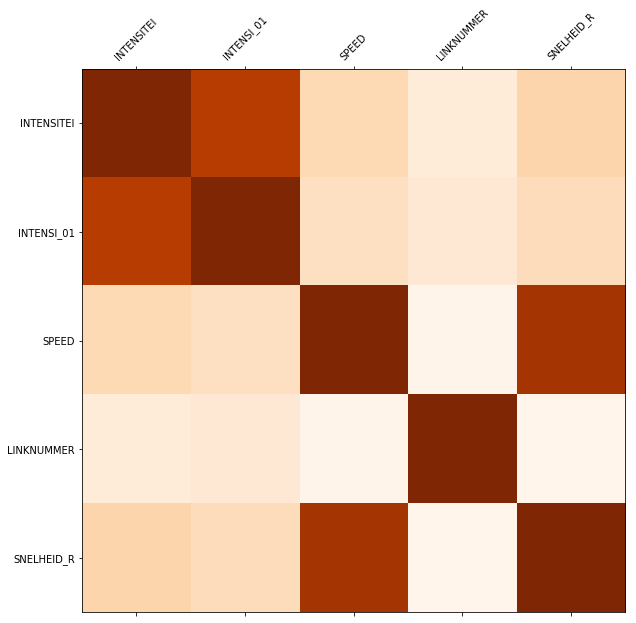

In [127]:
from sklearn.utils import shuffle

pd_all = shuffle(pd_all) # Shuffle the dataset to randomize the data

# Features
x = pd_all[['INTENSITEI', 'INTENSI_01', 'SPEED', 'LINKNUMMER', 'SNELHEID_R']]
# Label
y = pd_all['HIGHWAY_LABEL']

# Check data for correlation
plot_corr(x)

In [128]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)
print(x_train.shape, y_train.shape)

(827371, 5) (827371,)


In [129]:
from sklearn.tree import DecisionTreeClassifier

# This max_depth gave the best score
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=50, max_features=5)
clf = clf.fit(x_train, y_train)

measure_performance(x_test, y_test, clf, show_classification_report=True, show_confusion_matrix=False)

Accuracy:0.524 

Classification report
             precision    recall  f1-score   support

          0       0.57      0.55      0.56     70059
          1       0.36      0.36      0.36      6609
          2       0.52      0.53      0.53     40974
          3       0.47      0.47      0.47     27088
          4       0.44      0.45      0.44     24200
          5       0.30      0.30      0.30      4744
          6       0.62      0.63      0.62     77930
          7       0.29      0.30      0.30      9845
          8       0.07      0.08      0.07        12
          9       0.36      0.36      0.36      6340
         10       0.05      0.05      0.05       953
         11       0.38      0.39      0.39      7037

avg / total       0.53      0.52      0.52    275791
 



In [175]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=20, max_features=5)
clf = clf.fit(x_train, y_train)

measure_performance(x_test, y_test, clf, show_classification_report=True, show_confusion_matrix=False)

Accuracy:0.560 

Classification report
             precision    recall  f1-score   support

        0.0       0.52      0.77      0.62     70035
        1.0       0.65      0.43      0.52     47335
        3.0       0.62      0.32      0.42     27004
        4.0       0.40      0.48      0.44     24268
        5.0       0.52      0.18      0.27      4662
        6.0       0.62      0.70      0.66     78264
        7.0       0.49      0.15      0.23      9953
        8.0       0.00      0.00      0.00        16
        9.0       0.50      0.19      0.27      6329
       10.0       0.10      0.01      0.02       944
       11.0       0.54      0.21      0.30      6981

avg / total       0.57      0.56      0.54    275791
 



/Users/robvangastel/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [176]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf = clf.fit(x_train, y_train)

measure_performance(x_test, y_test, clf, show_classification_report=True, show_confusion_matrix=False)

Accuracy:0.254 

Classification report
             precision    recall  f1-score   support

        0.0       0.25      1.00      0.41     70035
        1.0       0.00      0.00      0.00     47335
        3.0       0.00      0.00      0.00     27004
        4.0       0.00      0.00      0.00     24268
        5.0       0.00      0.00      0.00      4662
        6.0       0.00      0.00      0.00     78264
        7.0       0.00      0.00      0.00      9953
        8.0       0.00      0.00      0.00        16
        9.0       0.00      0.00      0.00      6329
       10.0       0.00      0.00      0.00       944
       11.0       0.00      0.00      0.00      6981

avg / total       0.06      0.25      0.10    275791
 



/Users/robvangastel/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Try KKNeighbors after the classification of a score of 55,9% for RandomForrest and a score of 25,2% for LogisticRegression.

In [177]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf = clf.fit(x_train, y_train)

measure_performance(x_test, y_test, clf, show_classification_report=True, show_confusion_matrix=False)

Accuracy:0.680 

Classification report
             precision    recall  f1-score   support

        0.0       0.67      0.78      0.72     70035
        1.0       0.66      0.68      0.67     47335
        3.0       0.68      0.68      0.68     27004
        4.0       0.63      0.60      0.61     24268
        5.0       0.53      0.37      0.44      4662
        6.0       0.74      0.73      0.74     78264
        7.0       0.53      0.33      0.41      9953
        8.0       0.00      0.00      0.00        16
        9.0       0.58      0.41      0.48      6329
       10.0       0.17      0.03      0.05       944
       11.0       0.60      0.44      0.51      6981

avg / total       0.67      0.68      0.67    275791
 



We used all features and noticed in the correlation, intensitei and intensit_01 and speed and snelheid_R have a strong correlation and are redundant obviously. So we reduced the features to 3.

In [107]:
# Reduce the size of the X-axis to 3 features.
x = pd_all[['INTENSITEI', 'SPEED', 'LINKNUMMER']]

# In testing this we noticed the best way for classification of the roads is linknummer

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)
print(x_train.shape, y_train.shape)

(827371, 3) (827371,)


In [186]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=20, max_features=3)
clf = clf.fit(x_train, y_train)

measure_performance(x_test, y_test, clf, show_classification_report=True, show_confusion_matrix=False)

Accuracy:0.571 

Classification report
             precision    recall  f1-score   support

        0.0       0.53      0.77      0.63     69714
        1.0       0.66      0.45      0.54     47483
        3.0       0.66      0.35      0.45     27195
        4.0       0.42      0.48      0.45     24419
        5.0       0.52      0.19      0.27      4625
        6.0       0.63      0.71      0.67     78041
        7.0       0.45      0.15      0.23      9825
        8.0       0.00      0.00      0.00        17
        9.0       0.52      0.22      0.31      6359
       10.0       0.04      0.00      0.01       980
       11.0       0.56      0.25      0.34      7133

avg / total       0.58      0.57      0.55    275791
 



In [187]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf = clf.fit(x_train, y_train)

measure_performance(x_test, y_test, clf, show_classification_report=True, show_confusion_matrix=False)

Accuracy:0.679 

Classification report
             precision    recall  f1-score   support

        0.0       0.67      0.78      0.72     69714
        1.0       0.66      0.69      0.67     47483
        3.0       0.68      0.67      0.67     27195
        4.0       0.63      0.60      0.62     24419
        5.0       0.53      0.38      0.44      4625
        6.0       0.74      0.73      0.73     78041
        7.0       0.53      0.33      0.40      9825
        8.0       1.00      0.06      0.11        17
        9.0       0.56      0.40      0.47      6359
       10.0       0.21      0.04      0.06       980
       11.0       0.61      0.43      0.50      7133

avg / total       0.67      0.68      0.67    275791
 



We got a pretty highscore and it's related to the linknummer small example:

In [188]:
from sklearn.neighbors import KNeighborsClassifier

# Reduce the size of the X-axis to 2 features.
x = pd_all[['INTENSITEI', 'SPEED']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)

clf = KNeighborsClassifier()
clf = clf.fit(x_train, y_train)

measure_performance(x_test, y_test, clf, show_classification_report=True, show_confusion_matrix=False)

Accuracy:0.279 

Classification report
             precision    recall  f1-score   support

        0.0       0.33      0.50      0.40     69714
        1.0       0.18      0.15      0.17     47483
        3.0       0.15      0.09      0.11     27195
        4.0       0.13      0.05      0.08     24419
        5.0       0.08      0.02      0.03      4625
        6.0       0.31      0.39      0.34     78041
        7.0       0.09      0.02      0.03      9825
        8.0       0.00      0.00      0.00        17
        9.0       0.08      0.01      0.01      6359
       10.0       0.00      0.00      0.00       980
       11.0       0.07      0.01      0.01      7133

avg / total       0.24      0.28      0.25    275791
 



/Users/robvangastel/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


To see if we could get a higher score we grouped up the label in smaller groups.

In [148]:
# Second highway label group
pd_all['HIGHWAY_LABEL2'] = pd_all['HIGHWAY'].map({'cycleway' : 0, 'secondary': 2, 'residential': 1, 'tertiary': 2
                                           , 'footway': 1, 'pedestrian': 1, 'unclassified': 3, 'service': 2
                                           , 'secondary_link': 2, 'path': 1, 'steps': 1, 'track': 0 })

pd_all = pd_all.dropna()

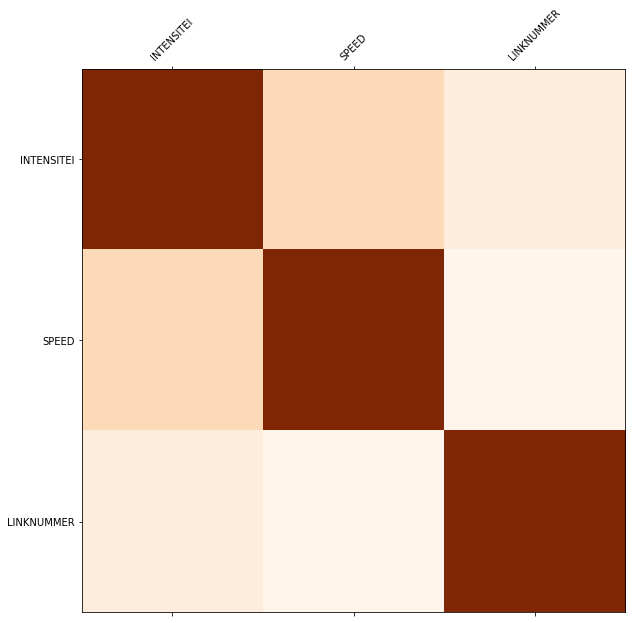

In [149]:
# Features
x = pd_all[['INTENSITEI', 'SPEED', 'LINKNUMMER']]
# Label
y = pd_all['HIGHWAY_LABEL2']

# Check data for correlation
plot_corr(x)

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=33)
print(x_train.shape, y_train.shape)

(827371, 3) (827371,)


In [14]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=20, max_features=3)
clf = clf.fit(x_train, y_train)

measure_performance(x_test, y_test, clf, show_classification_report=True, show_confusion_matrix=False)

Accuracy:0.608 

Classification report
             precision    recall  f1-score   support

          0       0.57      0.70      0.63     76525
          1       0.61      0.61      0.61     77508
          2       0.62      0.32      0.42     43282
          3       0.65      0.68      0.66     78476

avg / total       0.61      0.61      0.60    275791
 



KNN has the best result, now we're going to find the optimal value for neighbour K.

In [152]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf = clf.fit(x_train, y_train)

measure_performance(x_test, y_test, clf, show_classification_report=True, show_confusion_matrix=False)

Accuracy:0.718 

Classification report
             precision    recall  f1-score   support

          0       0.70      0.77      0.73     77096
          1       0.71      0.72      0.72     77211
          2       0.69      0.63      0.66     43554
          3       0.76      0.72      0.74     77930

avg / total       0.72      0.72      0.72    275791
 



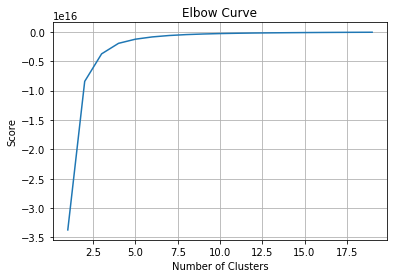

In [23]:
from sklearn.cluster import KMeans

x_sample = x

Nc = range(1, 20) # Clusters

kmeans = [KMeans(n_clusters=i) for i in Nc]
score = [kmeans[i].fit(x_sample).score(x_sample) for i in range(len(kmeans))] 

# Show plot
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.grid()
plt.show()

In [153]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=4) # Optimal value for neighbours
clf = clf.fit(x_train, y_train)

# The score is about 3% lower which means that the last score was probably over fitting 
measure_performance(x_test, y_test, clf, show_classification_report=True, show_confusion_matrix=False)

Accuracy:0.724 

Classification report
             precision    recall  f1-score   support

          0       0.70      0.80      0.75     77096
          1       0.72      0.73      0.72     77211
          2       0.70      0.64      0.67     43554
          3       0.78      0.68      0.73     77930

avg / total       0.73      0.72      0.72    275791
 



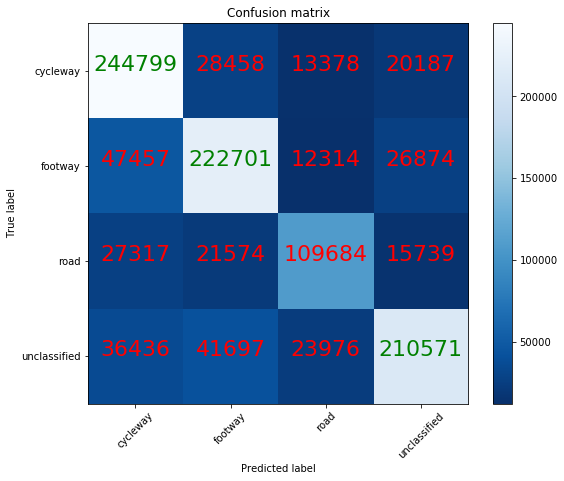

In [126]:
from sklearn.model_selection import cross_val_predict

labels = ['cycleway', 'footway', 'road', 'unclassified']
prediction = cross_val_predict(clf, x, y, cv=3, n_jobs=3)

plot_confusion_matrix(y, prediction, classes=labels)

In [50]:
# Clean the data for 2015
# Only year without a highway
pd_2015['INTENSITEI'] = pd_2015['INTENSITEI'].astype(float)
pd_2015['SPEED'] = pd_2015['SNELHEID'].astype(float)
pd_2015['LINKNUMMER'] = pd_2015['LINKNUMMER'].astype(float)

x_2015 = pd_2015[['INTENSITEI', 'SPEED', 'LINKNUMMER']]
x_2015 = x_2015.dropna()
x_2015_matrix = x_2015.as_matrix()

# Clean the data for 2015
# Only year without a highway
pd_2015['INTENSITEI'] = pd_2015['INTENSITEI'].astype(float)
pd_2015['SPEED'] = pd_2015['SNELHEID'].astype(float)
pd_2015['LINKNUMMER'] = pd_2015['LINKNUMMER'].astype(float)

x_2015 = pd_2015[['INTENSITEI', 'SPEED', 'LINKNUMMER']]
x_2015 = x_2015.dropna()
x_2015_matrix = x_2015.as_matrix()

In [51]:
predictions = clf.predict_proba(x_2015_matrix)
predictions

array([[ 0.25,  0.75,  0.  ,  0.  ],
       [ 0.75,  0.  ,  0.  ,  0.25],
       [ 0.25,  0.  ,  0.75,  0.  ],
       ..., 
       [ 0.25,  0.25,  0.5 ,  0.  ],
       [ 0.  ,  1.  ,  0.  ,  0.  ],
       [ 0.  ,  0.75,  0.25,  0.  ]])

In [72]:
pd_2015_final = pd.DataFrame({
    'Intensiteit' : x_2015['INTENSITEI'],
    'Speed': x_2015['SPEED'],
    'LinkNummer': x_2015['LINKNUMMER'],
    'cycleway': predictions[:,0],
    'footway': predictions[:,1],
    'road': predictions[:,2],
    'unclassified': predictions[:,3]
})

pd_2015_final.head()

pd_2015_final = pd.DataFrame({
    'Intensiteit' : x_2015['INTENSITEI'],
    'Speed': x_2015['SPEED'],
    'LinkNummer': x_2015['LINKNUMMER'],
    'cycleway': predictions[:,0],
    'footway': predictions[:,1],
    'road': predictions[:,2],
    'unclassified': predictions[:,3]
})

pd_2015_final.head()

,Intensiteit,LinkNummer,Speed,cycleway,footway,road,unclassified
0,0.0,114103.0,0.0000,0.25,0.75,0.00,0.00
1,7.0,115178.0,20.1144,0.75,0.00,0.00,0.25
2,15.0,132476.0,18.9631,0.25,0.00,0.75,0.00
3,8.0,134671.0,18.6179,0.00,0.00,0.00,1.00
4,66.0,134773.0,23.8729,0.75,0.00,0.00,0.25


In [77]:
pd_2015_max = pd_2015_final[['cycleway', 'footway', 'road', 'unclassified']]

pd_2015_max['Highest'] = pd_2015_max.idxmax(axis=1)
pd_2015['HIGHWAY'] = pd_2015_max['Highest']
pd_2015

/Users/robvangastel/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,LINKNUMMER,SNELHEID,INTENSITEI,SNELHEID_R,OBJECTID,PROVINCIE,id,Plaats,geometry,SPEED,HIGHWAY
0,114103.0,0.00000,0.0,0.00000,11,Noord-Brabant,15,Geffen,LINESTRING (160229.3562712437 416139.439801846...,0.00000,footway
1,115178.0,20.11440,7.0,0.87819,11,Noord-Brabant,15,Geffen,LINESTRING (160497.5317510279 416237.485412879...,20.11440,cycleway
2,132476.0,18.96310,15.0,0.87898,11,Noord-Brabant,11,'S-Hertogenbosch,LINESTRING (149089.4914946315 412810.154554765...,18.96310,road
3,134671.0,18.61790,8.0,0.86626,11,Noord-Brabant,11,'S-Hertogenbosch,LINESTRING (149160.5617616667 412048.752403343...,18.61790,unclassified
4,134773.0,23.87290,66.0,0.97184,11,Noord-Brabant,11,'S-Hertogenbosch,LINESTRING (149117.175333614 411938.7286021027...,23.87290,cycleway
5,135878.0,23.33810,88.0,0.91093,11,Noord-Brabant,11,'S-Hertogenbosch,LINESTRING (149912.8147783136 412875.229859619...,23.33810,cycleway
6,136186.0,19.55300,4.0,0.89415,11,Noord-Brabant,11,'S-Hertogenbosch,LINESTRING (150812.4038591867 413476.874247909...,19.55300,road
7,136624.0,19.27440,92.0,0.88183,11,Noord-Brabant,11,'S-Hertogenbosch,LINESTRING (151349.4736692552 412386.049697238...,19.27440,road
8,139443.0,16.88600,11.0,0.83711,11,Noord-Brabant,12,Rosmalen,LINESTRING (153954.9281976359 413768.544586959...,16.88600,cycleway
9,165650.0,12.80030,4.0,0.64202,11,Noord-Brabant,16,Oss,LINESTRING (162549.1412216898 418608.820614091...,12.80030,cycleway


In [78]:
pd_2015.to_csv('data/data_2015_highway.csv')
pd_2015.to_json('data/data_2015_highway.json')

In [97]:
# Take a margin from all the data and compare this with the fastcycleway and took for a higher average in speed. 
# Look for difference in average speed for each year 2015, 2016, 2017

avg_speed_all = pd_all['SPEED'].mean(axis=0)
avg_speed_2015 = pd_2015['SNELHEID'].mean(axis=0)
avg_speed_2016 = pd_2016['SPEED'].mean(axis=0)
avg_speed_2017 = pd_2017['SPEED'].mean(axis=0)

print("Average speed 2016 overal: " + str(avg_speed_all) + "Km.")
print("Average speed 2015 fastcycle route: " + str(avg_speed_2015) + "Km.")
print("Average speed 2016 fastcycle route: " + str(avg_speed_2016) + "Km.")
print("Average speed 2017 fastcycle route: " + str(avg_speed_2017) + "Km.")

Average speed 2016 overal: 16.06288236669645
Average speed 2015 fastcycle route: 16.29499659130429
Average speed 2016 fastcycle route: 16.192221556047205
Average speed 2017 fastcycle route: 16.95734929079423


KeyError: 'HIGHWAY'